In [1]:
# 1. Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os



C:\Users\reiha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 2. Defining Directories for Training and Testing
train_dir = r"C:\Users\reiha\Downloads\archive (16)\train"
test_dir = r"C:\Users\reiha\Downloads\archive (16)\test"

# 3. Applying Data Augmentation for Training and Testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical"
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
# 5. Building the Model using Functional API
input_layer = Input(shape=(48, 48, 3))

# Define the model architecture
x = Conv2D(64, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(2, 2)(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = BatchNormalization()(x)

x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(7, activation='softmax')(x)  # 7 emotion classes

# Define the final model
custom_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
custom_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])



In [11]:
# 6. Train the model (Pretraining)
custom_model.fit(
    train_generator,
    epochs=10,  # Pretrain for 10 epochs
    validation_data=test_generator
)



Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.2794 - loss: 1.7433 - val_accuracy: 0.2974 - val_loss: 1.7154
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.2876 - loss: 1.7410 - val_accuracy: 0.3155 - val_loss: 1.7001
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 284s 316ms/step - accuracy: 0.3045 - loss: 1.6893 - val_accuracy: 0.3704 - val_loss: 1.6209
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 0.3400 - loss: 1.6436 - val_accuracy: 0.4288 - val_loss: 1.4837
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.3433 - loss: 1.6115 - val_accuracy: 0.3672 - val_loss: 1.5528
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.3686 - loss: 1.5773 - val_accuracy: 0.4388 - val_loss: 1.4601
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.3813 - loss: 1.5640 - val_accuracy: 0.4489 - val_loss: 1.4276
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.3996 - loss: 1.5357 

In [5]:
# Save the pretrained model
custom_model.save("custom_emotion_model.h5")



In [12]:
# Load the pretrained model
pretrained_model = load_model("custom_emotion_model.h5")

# Unfreeze some layers for fine-tuning
for layer in pretrained_model.layers[:-4]:  
    layer.trainable = True

# Compile the fine-tuned model with a lower learning rate
pretrained_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Fine-tune the model
history = pretrained_model.fit(
    train_generator,
    epochs=15,  # Fine-tune for 25 more epochs
    validation_data=test_generator
)



Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.2487 - loss: 1.8114 - val_accuracy: 0.2807 - val_loss: 1.7820
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.2624 - loss: 1.7906 - val_accuracy: 0.2923 - val_loss: 1.7337
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.2714 - loss: 1.7729 - val_accuracy: 0.2321 - val_loss: 1.8082
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.2875 - loss: 1.7357 - val_accuracy: 0.3585 - val_loss: 1.6182
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.3066 - loss: 1.7136 - val_accuracy: 0.3862 - val_loss: 1.5908
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.3189 - loss: 1.6791 - val_accuracy: 0.3766 - val_loss: 1.6247
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.3419 - loss: 1.6507 - val_accuracy: 0.4202 - val_loss: 1.5505
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.3502 - loss: 1.6289 - 

In [13]:
# 8. Evaluating the Model
test_loss, test_accuracy = pretrained_model.evaluate(test_generator)
print(f"Fine-Tuned Test Accuracy: {test_accuracy * 100:.2f}%")



225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5065 - loss: 1.3013
Fine-Tuned Test Accuracy: 50.11%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Activations Shape: (1, 8, 8, 256)


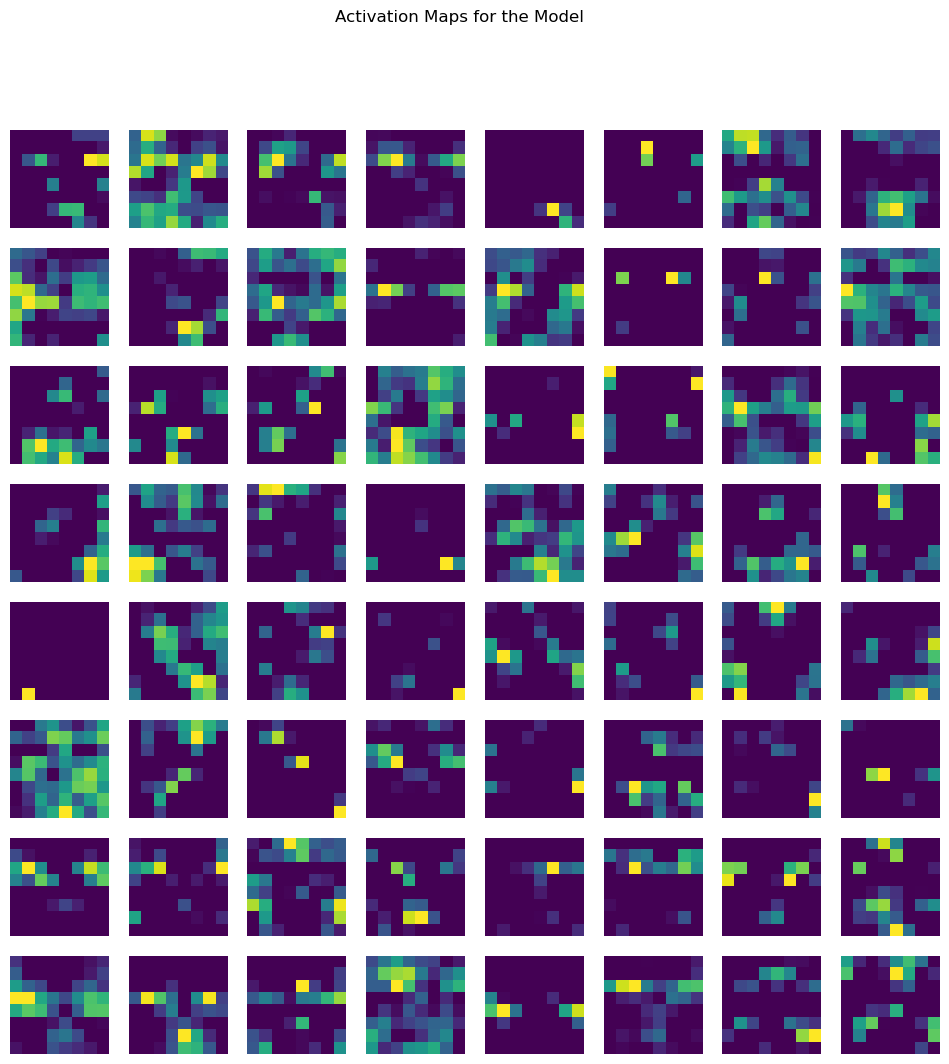

In [14]:
# 9. Function to visualize activation maps
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (48, 48))  # Resize to the size expected by the model
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def visualize_activation_map(img_path, model):
    img = preprocess_image(img_path)
    
    # Choose the layer for activation map (e.g., the last convolutional layer)
    last_conv_layer = model.get_layer("conv2d_2")  # Update this to any layer you want
    
    # Create a model that will return the activations of the chosen convolutional layer
    activation_model = Model(inputs=model.input, outputs=last_conv_layer.output)
    
    # Get the activations
    activations = activation_model.predict(img)
    
    # Print the shape of the activations to check
    print("Activations Shape:", activations.shape)
    
    # Visualize the first few filters
    num_filters = activations.shape[-1]
    
    # Define a grid to display multiple filters (8x8 grid for example)
    grid_size = min(8, num_filters)
    
    # Create a plot with a grid of subplots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
    axes = axes.flatten()
    
    for i in range(grid_size * grid_size):
        ax = axes[i]
        ax.imshow(activations[0, :, :, i], cmap='viridis')  # Show the i-th filter
        ax.axis('off')  # Hide axes for clarity
        
    plt.suptitle('Activation Maps for the Model')
    plt.show()

# Test on an image from the dataset
sample_img = r"C:\Users\reiha\Downloads\archive (16)\train\neutral\Training_995545.jpg"
visualize_activation_map(sample_img, pretrained_model)